# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.90'

In [2]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [3]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym50,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model
0,187-9-113-A,103.869510,0.015525,1284.444061,0.014535,203.947454,1284.444061,651.919217,1.298712,3.207355,...,1.258571,1.288914,0.671620,0.012736,1.096774,1.166154,0.167341,0.003613,PseudoVoigtModel,PseudoVoigtModel
1,187-9-114-A-rep1,103.436261,0.008829,1285.482750,0.008236,193.237524,1285.482750,371.656167,0.732633,1.917738,...,1.078571,1.001653,0.115128,0.007583,1.119632,1.075431,0.137872,0.003036,PseudoVoigtModel,PseudoVoigtModel
2,187-9-114-A-rep2,103.441308,0.008961,1285.481252,0.007642,198.628456,1285.481252,374.904820,0.712200,2.024739,...,1.004640,1.056637,0.006610,0.007171,1.124611,1.071895,0.141646,0.002944,PseudoVoigtModel,PseudoVoigtModel
3,187-9-114-A-rep3,103.450650,0.008618,1285.478907,0.007254,194.704942,1285.478907,373.815178,0.705966,1.885286,...,1.043796,1.070175,0.061836,0.007252,1.108504,1.060797,0.128982,0.003183,PseudoVoigtModel,PseudoVoigtModel
4,187-9-115-A,103.210738,0.010507,1286.023865,0.008919,131.616974,1286.023865,196.175311,0.596031,1.703628,...,1.115727,1.037578,0.137954,0.009057,1.213523,1.224932,0.202989,0.004006,PseudoVoigtModel,PseudoVoigtModel


In [4]:
df2['filename']

0                       187-9-113-A
1                  187-9-114-A-rep1
2                  187-9-114-A-rep2
3                  187-9-114-A-rep3
4                       187-9-115-A
5                 186-11-122-C-rep1
6     186-11-122-C-rep2_CRR_DiadFit
7      187-9-116-B-rep1_CRR_DiadFit
8                  187-9-116-B-rep2
9                  187-9-116-B-rep3
10                      187-9-117-A
11          187-9-119-A_CRR_DiadFit
12                  FG19-101-A-rep4
13                  FG19-101-A-rep5
14                  FG19-101-A-rep6
15                  FG19-101-A-rep1
16                  FG19-101-A-rep2
17      FG19-101-A-rep3_CRR_DiadFit
18                     186-11-121-A
19                     186-11-121-B
20         186-11-121-C_CRR_DiadFit
21    186-11-121-D-rep1_CRR_DiadFit
22                     186-11-121-E
23                186-11-121-D-rep2
24                     186-11-122-A
25                     186-11-122-B
26                      187-9-116-A
27                      187-

## First, get the metadata for this day

In [9]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'Cap','window','Video', 'nodiad'],
 sort=True)
diad_meta[0]

'04 FG19-101-A-50X.txt'

## Now get all the important information out of the metadata files

In [10]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 80/80 [00:00<00:00, 1034.50it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,FG19-101-A-rep1.txt,"May 6, 2024\n",May,6.0,6.020,45.0,5.0,50.0,"['0h', '3m', '46s']",1:23:39 PM\n,48219.0,1324.767
1,FG19-101-A-rep2.txt,"May 6, 2024\n",May,6.0,6.026,45.0,5.0,50.0,"['0h', '3m', '46s']",1:27:53 PM\n,48473.0,1324.767
2,FG19-101-A-rep3.txt,"May 6, 2024\n",May,6.0,6.036,45.0,5.0,50.0,"['0h', '3m', '46s']",1:37:07 PM\n,49027.0,1324.767
3,187-9-113-A.txt,"May 6, 2024\n",May,6.0,6.064,60.0,4.0,50.0,"['0h', '4m', '2s']",2:02:22 PM\n,50542.0,1324.767
4,Nr5.txt,"May 6, 2024\n",May,6.0,6.005,45.0,3.0,100.0,"['0h', '2m', '17s']",2:28:43 PM\n,52123.0,1324.767


In [11]:
meta

,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,FG19-101-A-rep1.txt,"May 6, 2024\n",May,6.0,6.020,45.0,5.0,50.0,"['0h', '3m', '46s']",1:23:39 PM\n,48219.0,1324.767
1,FG19-101-A-rep2.txt,"May 6, 2024\n",May,6.0,6.026,45.0,5.0,50.0,"['0h', '3m', '46s']",1:27:53 PM\n,48473.0,1324.767
2,FG19-101-A-rep3.txt,"May 6, 2024\n",May,6.0,6.036,45.0,5.0,50.0,"['0h', '3m', '46s']",1:37:07 PM\n,49027.0,1324.767
3,187-9-113-A.txt,"May 6, 2024\n",May,6.0,6.064,60.0,4.0,50.0,"['0h', '4m', '2s']",2:02:22 PM\n,50542.0,1324.767
4,Nr5.txt,"May 6, 2024\n",May,6.0,6.005,45.0,3.0,100.0,"['0h', '2m', '17s']",2:28:43 PM\n,52123.0,1324.767
5,187-9-114-A-rep1.txt,"May 6, 2024\n",May,6.0,6.015,60.0,4.0,100.0,"['0h', '4m', '2s']",2:31:30 PM\n,52290.0,1324.767
6,187-9-114-A-rep2.txt,"May 6, 2024\n",May,6.0,6.014,60.0,4.0,100.0,"['0h', '4m', '1s']",2:36:23 PM\n,52583.0,1324.767
7,187-9-114-A-rep3.txt,"May 6, 2024\n",May,6.0,6.026,60.0,4.0,100.0,"['0h', '4m', '1s']",2:42:26 PM\n,52946.0,1324.767
8,187-9-115-A.txt,"May 6, 2024\n",May,6.0,6.036,60.0,4.0,100.0,"['0h', '4m', '1s']",2:54:48 PM\n,53688.0,1324.767
9,186-11-121-A.txt,"May 6, 2024\n",May,6.0,6.042,60.0,4.0,50.0,"['0h', '4m', '2s']",3:13:28 PM\n,54808.0,1324.767


## Then get a simple file name you can stitch with the spectra

In [12]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'FG19-101-A-rep1'

In [13]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['FG19-101-A-rep1', 'FG19-101-A-rep2', 'FG19-101-A-rep3',
       '187-9-113-A', 'Nr5', '187-9-114-A-rep1', '187-9-114-A-rep2',
       '187-9-114-A-rep3', '187-9-115-A', '186-11-121-A', '186-11-121-B',
       '186-11-121-C', '186-11-121-D-rep1', '186-11-121-E',
       '186-11-121-D-rep2', '186-11-122-A', '186-11-122-B',
       '186-11-122-C-rep1', '186-11-122-C-rep2', '187-9-116-A',
       '187-9-116-B-rep1', '187-9-116-B-rep2', '187-9-116-B-rep3',
       '187-9-117-A', '187-9-119-A', '187-9-120-A', 'FG19-101-A-rep4',
       'FG19-101-A-rep5', 'FG19-101-A-rep6'], dtype=object)

## Now get filename from spectra into same form as metadata

In [14]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
187-9-113-A


In [15]:
df2['filename']

0                       187-9-113-A
1                  187-9-114-A-rep1
2                  187-9-114-A-rep2
3                  187-9-114-A-rep3
4                       187-9-115-A
5                 186-11-122-C-rep1
6     186-11-122-C-rep2_CRR_DiadFit
7      187-9-116-B-rep1_CRR_DiadFit
8                  187-9-116-B-rep2
9                  187-9-116-B-rep3
10                      187-9-117-A
11          187-9-119-A_CRR_DiadFit
12                  FG19-101-A-rep4
13                  FG19-101-A-rep5
14                  FG19-101-A-rep6
15                  FG19-101-A-rep1
16                  FG19-101-A-rep2
17      FG19-101-A-rep3_CRR_DiadFit
18                     186-11-121-A
19                     186-11-121-B
20         186-11-121-C_CRR_DiadFit
21    186-11-121-D-rep1_CRR_DiadFit
22                     186-11-121-E
23                186-11-121-D-rep2
24                     186-11-122-A
25                     186-11-122-B
26                      187-9-116-A
27                      187-

In [16]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['187-9-113-A', '187-9-114-A-rep1', '187-9-114-A-rep2',
       '187-9-114-A-rep3', '187-9-115-A', '186-11-122-C-rep1',
       '186-11-122-C-rep2', '187-9-116-B-rep1', '187-9-116-B-rep2',
       '187-9-116-B-rep3', '187-9-117-A', '187-9-119-A',
       'FG19-101-A-rep4', 'FG19-101-A-rep5', 'FG19-101-A-rep6',
       'FG19-101-A-rep1', 'FG19-101-A-rep2', 'FG19-101-A-rep3',
       '186-11-121-A', '186-11-121-B', '186-11-121-C',
       '186-11-121-D-rep1', '186-11-121-E', '186-11-121-D-rep2',
       '186-11-122-A', '186-11-122-B', '187-9-116-A', '187-9-120-A'],
      dtype='<U17')

In [17]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-9-113-A,103.869510,0.015525,1284.444061,0.014535,203.947454,1284.444061,651.919217,1.298712,3.207355,...,May,6.0,6.064,60.0,4.0,50.0,"['0h', '4m', '2s']",2:02:22 PM\n,50542.0,1324.767
1,187-9-114-A-rep1,103.436261,0.008829,1285.482750,0.008236,193.237524,1285.482750,371.656167,0.732633,1.917738,...,May,6.0,6.015,60.0,4.0,100.0,"['0h', '4m', '2s']",2:31:30 PM\n,52290.0,1324.767
2,187-9-114-A-rep2,103.441308,0.008961,1285.481252,0.007642,198.628456,1285.481252,374.904820,0.712200,2.024739,...,May,6.0,6.014,60.0,4.0,100.0,"['0h', '4m', '1s']",2:36:23 PM\n,52583.0,1324.767
3,187-9-114-A-rep3,103.450650,0.008618,1285.478907,0.007254,194.704942,1285.478907,373.815178,0.705966,1.885286,...,May,6.0,6.026,60.0,4.0,100.0,"['0h', '4m', '1s']",2:42:26 PM\n,52946.0,1324.767
4,187-9-115-A,103.210738,0.010507,1286.023865,0.008919,131.616974,1286.023865,196.175311,0.596031,1.703628,...,May,6.0,6.036,60.0,4.0,100.0,"['0h', '4m', '1s']",2:54:48 PM\n,53688.0,1324.767


In [18]:
df_combo

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-9-113-A,103.869510,0.015525,1284.444061,0.014535,203.947454,1284.444061,651.919217,1.298712,3.207355,...,May,6.0,6.064,60.0,4.0,50.0,"['0h', '4m', '2s']",2:02:22 PM\n,50542.0,1324.767
1,187-9-114-A-rep1,103.436261,0.008829,1285.482750,0.008236,193.237524,1285.482750,371.656167,0.732633,1.917738,...,May,6.0,6.015,60.0,4.0,100.0,"['0h', '4m', '2s']",2:31:30 PM\n,52290.0,1324.767
2,187-9-114-A-rep2,103.441308,0.008961,1285.481252,0.007642,198.628456,1285.481252,374.904820,0.712200,2.024739,...,May,6.0,6.014,60.0,4.0,100.0,"['0h', '4m', '1s']",2:36:23 PM\n,52583.0,1324.767
3,187-9-114-A-rep3,103.450650,0.008618,1285.478907,0.007254,194.704942,1285.478907,373.815178,0.705966,1.885286,...,May,6.0,6.026,60.0,4.0,100.0,"['0h', '4m', '1s']",2:42:26 PM\n,52946.0,1324.767
4,187-9-115-A,103.210738,0.010507,1286.023865,0.008919,131.616974,1286.023865,196.175311,0.596031,1.703628,...,May,6.0,6.036,60.0,4.0,100.0,"['0h', '4m', '1s']",2:54:48 PM\n,53688.0,1324.767
5,186-11-122-C-rep1,103.818518,0.015283,1284.604638,0.013243,150.621356,1284.604638,446.033379,1.062902,2.335528,...,May,6.0,6.053,60.0,4.0,100.0,"['0h', '4m', '1s']",3:59:52 PM\n,57592.0,1324.767
6,186-11-122-C-rep2,103.792037,0.013553,1284.642124,0.011826,209.496054,1284.642124,588.002727,1.025545,3.168824,...,May,6.0,6.052,60.0,4.0,100.0,"['0h', '4m', '2s']",4:04:52 PM\n,57892.0,1324.767
7,187-9-116-B-rep1,103.375850,0.012220,1285.641585,0.010973,132.668707,1285.641585,250.406134,0.676100,1.938851,...,May,6.0,6.059,60.0,4.0,50.0,"['0h', '4m', '1s']",4:38:14 PM\n,59894.0,1324.767
8,187-9-116-B-rep2,103.346123,0.011108,1285.672027,0.009502,138.023993,1285.672027,255.634151,0.691746,1.525749,...,May,6.0,6.057,60.0,4.0,50.0,"['0h', '4m', '1s']",4:44:33 PM\n,60273.0,1324.767
9,187-9-116-B-rep3,103.358261,0.011014,1285.649360,0.009394,132.307711,1285.649360,235.334109,0.665254,1.626006,...,May,6.0,6.059,60.0,4.0,50.0,"['0h', '4m', '1s']",4:49:34 PM\n,60574.0,1324.767


In [19]:
str_prefix

' '

## If you have secondary phases, now is the time to merge those in

In [20]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)
df_combo_sec_phase

Made a df!
good job, no duplicate file names


,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name_x,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name_y,Carb_Diad_Ratio,SO2_Diad_Ratio
0,187-9-113-A,103.869510,0.015525,1284.444061,0.014535,203.947454,1284.444061,651.919217,1.298712,3.207355,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,187-9-114-A-rep1,103.436261,0.008829,1285.482750,0.008236,193.237524,1285.482750,371.656167,0.732633,1.917738,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,187-9-114-A-rep2,103.441308,0.008961,1285.481252,0.007642,198.628456,1285.481252,374.904820,0.712200,2.024739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,187-9-114-A-rep3,103.450650,0.008618,1285.478907,0.007254,194.704942,1285.478907,373.815178,0.705966,1.885286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,187-9-115-A,103.210738,0.010507,1286.023865,0.008919,131.616974,1286.023865,196.175311,0.596031,1.703628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,186-11-122-C-rep1,103.818518,0.015283,1284.604638,0.013243,150.621356,1284.604638,446.033379,1.062902,2.335528,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,186-11-122-C-rep2,103.792037,0.013553,1284.642124,0.011826,209.496054,1284.642124,588.002727,1.025545,3.168824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,187-9-116-B-rep1,103.375850,0.012220,1285.641585,0.010973,132.668707,1285.641585,250.406134,0.676100,1.938851,...,1150.981122,64.153613,37.794279,PseudoVoigtModel,NaN,NaN,NaN,NaN,NaN,0.106599
8,187-9-116-B-rep2,103.346123,0.011108,1285.672027,0.009502,138.023993,1285.672027,255.634151,0.691746,1.525749,...,1151.002573,65.550829,41.221268,PseudoVoigtModel,NaN,NaN,NaN,NaN,NaN,0.103782
9,187-9-116-B-rep3,103.358261,0.011014,1285.649360,0.009394,132.307711,1285.649360,235.334109,0.665254,1.626006,...,1151.066870,56.263171,36.513362,PseudoVoigtModel,NaN,NaN,NaN,NaN,NaN,0.094864


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [21]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    SO2_ratio=pf.calculate_CO2_SO2_ratio(peak_area_SO2=df_combo_sec_phase['Peak_Area_SO2'], 
peak_area_diad1=df_combo_sec_phase['Diad1_Voigt_Area'], peak_area_diad2=df_combo_sec_phase['Diad2_Voigt_Area'],
wavelength=532.067, T_K=37+273.15, efficiency_SO2=1, efficiency_CO2=0.5, 
sigma_SO2=4.03, sigma_CO2_v1=0.8, sigma_CO2_v2=1.23)
    df_combo_sec_phase['SO2_mol_ratio']=SO2_ratio['SO2']

In [22]:
df_combo_sec_phase

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Peak_Area_SO2,Peak_Height_SO2,Model_name_x,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name_y,Carb_Diad_Ratio,SO2_Diad_Ratio,SO2_mol_ratio
0,187-9-113-A,103.869510,0.015525,1284.444061,0.014535,203.947454,1284.444061,651.919217,1.298712,3.207355,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,187-9-114-A-rep1,103.436261,0.008829,1285.482750,0.008236,193.237524,1285.482750,371.656167,0.732633,1.917738,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,187-9-114-A-rep2,103.441308,0.008961,1285.481252,0.007642,198.628456,1285.481252,374.904820,0.712200,2.024739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,187-9-114-A-rep3,103.450650,0.008618,1285.478907,0.007254,194.704942,1285.478907,373.815178,0.705966,1.885286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,187-9-115-A,103.210738,0.010507,1286.023865,0.008919,131.616974,1286.023865,196.175311,0.596031,1.703628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,186-11-122-C-rep1,103.818518,0.015283,1284.604638,0.013243,150.621356,1284.604638,446.033379,1.062902,2.335528,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,186-11-122-C-rep2,103.792037,0.013553,1284.642124,0.011826,209.496054,1284.642124,588.002727,1.025545,3.168824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,187-9-116-B-rep1,103.375850,0.012220,1285.641585,0.010973,132.668707,1285.641585,250.406134,0.676100,1.938851,...,64.153613,37.794279,PseudoVoigtModel,NaN,NaN,NaN,NaN,NaN,0.106599,2.5
8,187-9-116-B-rep2,103.346123,0.011108,1285.672027,0.009502,138.023993,1285.672027,255.634151,0.691746,1.525749,...,65.550829,41.221268,PseudoVoigtModel,NaN,NaN,NaN,NaN,NaN,0.103782,2.4
9,187-9-116-B-rep3,103.358261,0.011014,1285.649360,0.009394,132.307711,1285.649360,235.334109,0.665254,1.626006,...,56.263171,36.513362,PseudoVoigtModel,NaN,NaN,NaN,NaN,NaN,0.094864,2.2


## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [23]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

8.550248346958103e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Area_Carb,Peak_Height_Carb,Model_name_y,Carb_Diad_Ratio,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,187-9-113-A,0.374116,0.007185,0.006791,0.002348,103.655431,0.015518,0.000865,0.015525,6.064,...,NaN,NaN,NaN,NaN,NaN,NaN,50542.0,0.997939,0.997931,0.997947
1,187-9-114-A-rep1,0.191472,0.004320,0.003613,0.002369,103.222400,0.008852,0.000852,0.008829,6.015,...,NaN,NaN,NaN,NaN,NaN,NaN,52290.0,0.997932,0.997924,0.997941
2,187-9-114-A-rep2,0.193485,0.004367,0.003669,0.002368,103.227330,0.008983,0.000851,0.008961,6.014,...,NaN,NaN,NaN,NaN,NaN,NaN,52583.0,0.997931,0.997923,0.997940
3,187-9-114-A-rep3,0.197243,0.004253,0.003534,0.002367,103.236526,0.008642,0.000851,0.008618,6.026,...,NaN,NaN,NaN,NaN,NaN,NaN,52946.0,0.997930,0.997922,0.997938
4,187-9-115-A,0.097715,0.005643,0.004168,0.003804,102.996861,0.010520,0.000848,0.010507,6.036,...,NaN,NaN,NaN,NaN,NaN,NaN,53688.0,0.997928,0.997920,0.997936


In [24]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

8.550248346958103e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Area_Carb,Peak_Height_Carb,Model_name_y,Carb_Diad_Ratio,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,187-9-113-A,0.374116,0.007185,0.006791,0.002348,103.655431,0.015518,0.000865,0.015525,6.064,...,NaN,NaN,NaN,NaN,NaN,NaN,50542.0,0.997939,0.997931,0.997947
1,187-9-114-A-rep1,0.191472,0.004320,0.003613,0.002369,103.222400,0.008852,0.000852,0.008829,6.015,...,NaN,NaN,NaN,NaN,NaN,NaN,52290.0,0.997932,0.997924,0.997941
2,187-9-114-A-rep2,0.193485,0.004367,0.003669,0.002368,103.227330,0.008983,0.000851,0.008961,6.014,...,NaN,NaN,NaN,NaN,NaN,NaN,52583.0,0.997931,0.997923,0.997940
3,187-9-114-A-rep3,0.197243,0.004253,0.003534,0.002367,103.236526,0.008642,0.000851,0.008618,6.026,...,NaN,NaN,NaN,NaN,NaN,NaN,52946.0,0.997930,0.997922,0.997938
4,187-9-115-A,0.097715,0.005643,0.004168,0.003804,102.996861,0.010520,0.000848,0.010507,6.036,...,NaN,NaN,NaN,NaN,NaN,NaN,53688.0,0.997928,0.997920,0.997936


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [25]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_May 6, 2024_fitted_2024-05-07.xlsx


## This helps visualize the errors on each spectra 

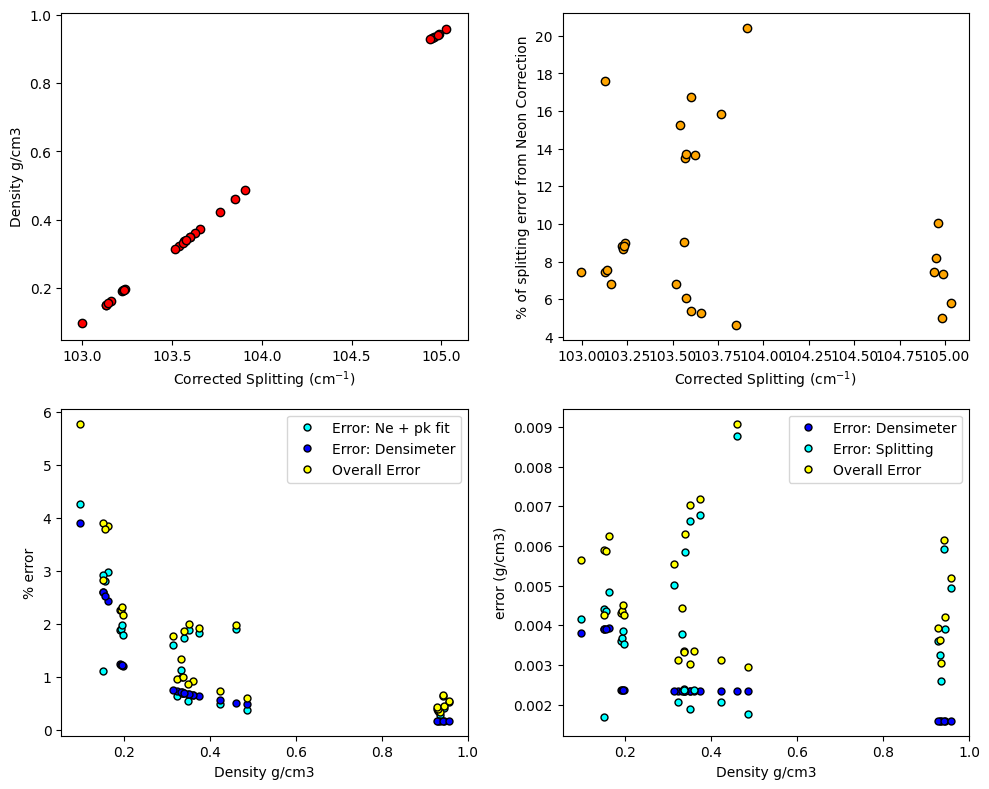

In [26]:
df=sorted_df
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=df.loc[df['Density g/cm3']>0]
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

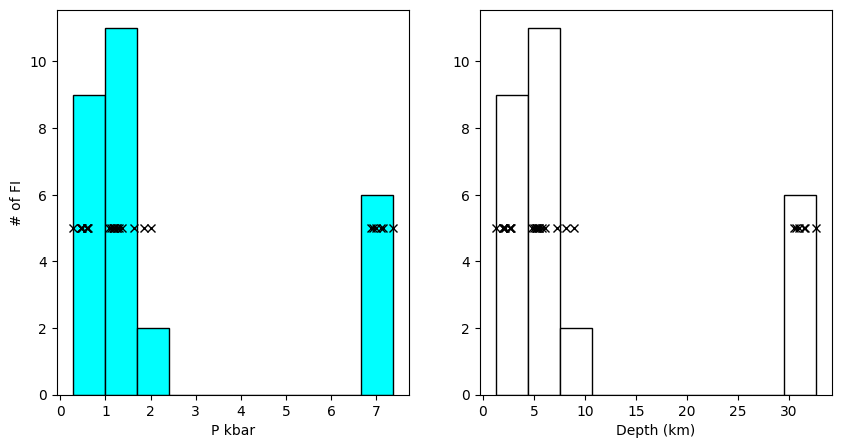

In [27]:
# Calculate pressure with a temperature estimate
Temp_C=1150
Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')